# The plan

* Live "Presentation" with Jupyter Notebooks, guaranteed not to work
* Pandas
* You lot trolling me

# Top Level Funky Stuff

* Data Import / Export functionality
* *Actually Decent* Datetime Operations
* Boiled in Statistics
* Groupby operations
* Integrations (`seaborn`,`cufflinks`)

# FYI / Disclaimers
* NI Postcode Data Sucks
* NI Constituency Boundaries Suck
* This has not been updated with corrected DfE RHI Claimant Data as it was not output in an open, readable format, so the below is shown only for educational purposes and no political or journalistic decision making should be based on its content...

# Requirements
* condable (or pip as backup)
    * pandas matplotlib seaborn beautifulsoup4 lxml xlrd requests'
* pip
    * cufflinks
* Rise presentation funkiness (requires python == 3.5)
    * https://github.com/damianavila/RISE
    
# Data Sources
* Election Office Constituency/Postcode data - http://www.eoni.org.uk/Elections/Electoral-areas
* RHI Data - Friendly Slackers


In [156]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)


## Ingress and Formatting

In [157]:
rhi_csv = 'rhi-nondomestic-beneficiaries-ltd-companies-organisations.csv'
#rhi_csv = 'tabula-RHI-beneficiaries-non-domestic-individuals-companies.csv'
df = pd.read_csv(rhi_csv)
display(df.head())
display(df.dtypes)

,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99,"£27,600.66"
0,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
1,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
2,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
3,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£52,297.88"
4,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£53,369.70"


Acheson & Glover Precast Ltd     object
06/11/2015                       object
BT75                             object
Solid Biomass Boiler             object
99                              float64
£27,600.66                       object
dtype: object

In [158]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']
                )
display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,06/11/2015,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,13/07/2015,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company             object
Date                object
Postcode            object
Type                object
Capacity (kWtH)    float64
Cash                object
dtype: object

In [159]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']                )
df['Date'] = pd.to_datetime(df['Date'])

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,2015-06-11,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                       object
dtype: object

In [160]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']                )
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£27,600.66"
1,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£30,507.19"
2,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,"£34,416.23"
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£50,543.44"
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,"£52,297.88"


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                       object
dtype: object

In [161]:
df = pd.read_csv(rhi_csv, 
                 names=['Company','Date','Postcode',
                        'Type','Capacity (kWtH)', 'Cash']
                )
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Cash'] = df['Cash'].replace('[£,]','', regex=True).astype(float)

display(df.head())
display(df.dtypes)

,Company,Date,Postcode,Type,Capacity (kWtH),Cash
0,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,27600.66
1,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,30507.19
2,Acheson & Glover Precast Ltd,2015-11-06,BT75,Solid Biomass Boiler,99.0,34416.23
3,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,50543.44
4,Acheson & Glover Precast Ltd,2015-07-13,BT75,Solid Biomass Boiler,99.0,52297.88


Company                    object
Date               datetime64[ns]
Postcode                   object
Type                       object
Capacity (kWtH)           float64
Cash                      float64
dtype: object

In [162]:
rhi_csv = 'tabula-RHI-beneficiaries-non-domestic-individuals-companies.csv'
df = pd.read_csv(rhi_csv)
df['Date'] = pd.to_datetime(df['Date of\rApplication'], format='%d/%m/%Y')
df['Cash'] = df['Amount of payments\rmade to 28 February\r2017 (£)*'].replace('[£,]','', regex=True).astype(float)
df.drop(['Date of\rApplication','Amount of payments\rmade to 28 February\r2017 (£)*'], axis=1, inplace=True) 
df.rename(columns={'Business or\rInstallation\rLocation':'Postcode', 'Installation\rCapacity\r(kWth)':'Capacity (kWtH)','Technology Type':'Type','Name':'Company'}, inplace=True)

## Stats and Basic Grouping

In [163]:
df.Cash.describe()

count      1746.000000
mean      34533.699943
std       23752.919869
min          73.220000
25%       14418.435000
50%       31820.715000
75%       48982.615000
max      252844.050000
Name: Cash, dtype: float64

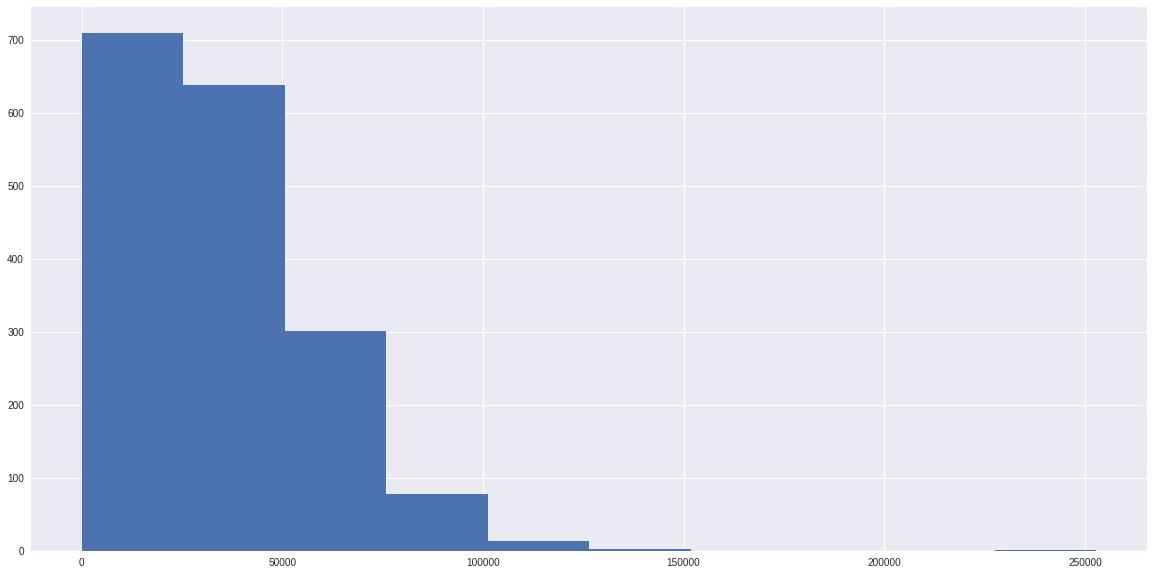

In [164]:
f,ax = plt.subplots()
df.Cash.hist(ax=ax)

In [165]:
df.Postcode.unique()

array(['BT39', 'BT75', 'BT80', 'BT81', 'BT42', 'BT62', 'BT44', 'BT24',
       'BT32', 'BT34', 'BT53', 'BT76', 'BT82', 'BT60', 'BT79', 'BT41',
       'BT43', 'BT70', 'BT46', 'BT31', 'BT23', 'BT71', 'BT45', 'BT29',
       'BT8', 'BT77', 'BT54', 'BT94', 'BT78', 'BT92', 'BT28', 'BT61',
       'BT19', 'BT20', 'BT67', 'BT63', 'BT9', 'BT74', 'BT25', 'BT30',
       'BT4', 'BT33', 'BT68', 'BT47', 'BT35', 'BT12', 'BT93', 'BT48',
       'BT22', 'BT21', 'BT51', 'BT49', 'BT27', 'BT40', 'BT17', 'BT6',
       'BT66', 'BT56', 'BT26', 'BT69', 'BT52', 'BT5', 'BA14', nan, 'BT36',
       'Bt78', 'BT3', 'BT64', 'BT57', 'Withheld'], dtype=object)

In [166]:
df.Postcode.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1717    False
1718    False
1719    False
1720    False
1721    False
1722    False
1723    False
1724    False
1725    False
1726    False
1727    False
1728    False
1729    False
1730    False
1731    False
1732    False
1733    False
1734    False
1735    False
1736    False
1737    False
1738    False
1739    False
1740    False
1741    False
1742    False
1743    False
1744    False
1745    False
1746    False
Name: Postcode, dtype: bool

In [167]:
df.dropna(how='all', inplace=True)
df.Postcode.sort_values().unique()

array(['BA14', 'BT12', 'BT17', 'BT19', 'BT20', 'BT21', 'BT22', 'BT23',
       'BT24', 'BT25', 'BT26', 'BT27', 'BT28', 'BT29', 'BT3', 'BT30',
       'BT31', 'BT32', 'BT33', 'BT34', 'BT35', 'BT36', 'BT39', 'BT4',
       'BT40', 'BT41', 'BT42', 'BT43', 'BT44', 'BT45', 'BT46', 'BT47',
       'BT48', 'BT49', 'BT5', 'BT51', 'BT52', 'BT53', 'BT54', 'BT56',
       'BT57', 'BT6', 'BT60', 'BT61', 'BT62', 'BT63', 'BT64', 'BT66',
       'BT67', 'BT68', 'BT69', 'BT70', 'BT71', 'BT74', 'BT75', 'BT76',
       'BT77', 'BT78', 'BT79', 'BT8', 'BT80', 'BT81', 'BT82', 'BT9',
       'BT92', 'BT93', 'BT94', 'Bt78', 'Withheld', nan], dtype=object)

In [168]:
# df['Postcode'] = df['Postcode'].apply(str.upper)
df['Postcode'] = df['Postcode'].str.upper() 


In [169]:
df[df.Postcode=='BA14'] # df.query("Postcode == 'BA14'")

,Company,Postcode,Type,Capacity (kWtH),Date,Cash
1155,National Trust (Crom Estate),BA14,Solid Biomass Boiler,99.0,2014-01-27,31564.68
1156,National Trust (Florence Court),BA14,Solid Biomass Boiler,36.0,2015-05-28,3148.25
1158,National Trust (Innisfee),BA14,Solid Biomass Boiler,99.0,2013-11-30,22766.50
1159,National Trust (Springhill House),BA14,Solid Biomass Boiler,80.0,2013-11-30,22717.76
1160,National Trust (Springhill),BA14,Solid Biomass Boiler,30.0,2013-11-30,4133.90
1161,National Trust (The Argory),BA14,Solid Biomass Boiler,95.0,2015-11-01,6005.90
1162,National Trust (The Argory),BA14,Solid Biomass Boiler,35.0,2015-11-01,3448.73


In [248]:
df.Cash.sum()

60295840.10000002

In [171]:
df.groupby('Postcode')['Cash'].sum().sort_values().head(20)

Postcode
BT56     22349.97
BT21     22866.87
BT64     24221.85
BT36     29881.69
BT17     32642.83
BT6      34574.91
BT52     55697.38
BT3      57728.22
BT20     69649.89
BT4      73901.93
BT22     76448.21
BT63     80514.89
BT19     90062.63
BA14     93785.72
BT9     101001.24
BT8     123077.28
BT5     146119.69
BT40    162768.04
BT54    175783.89
BT31    199843.06
Name: Cash, dtype: float64

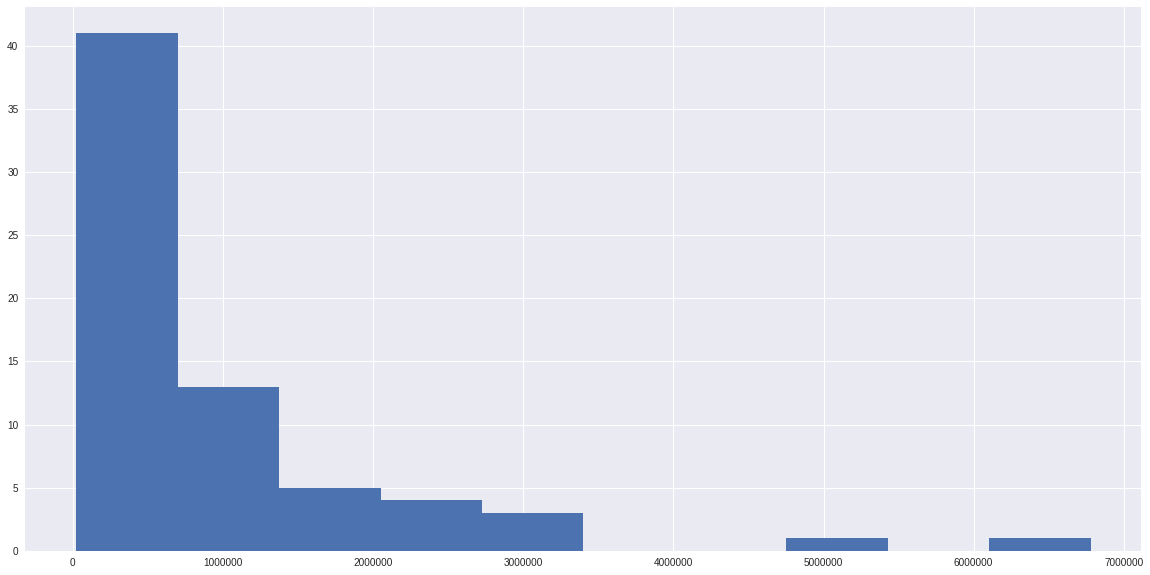

In [172]:
f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().hist(ax=ax)

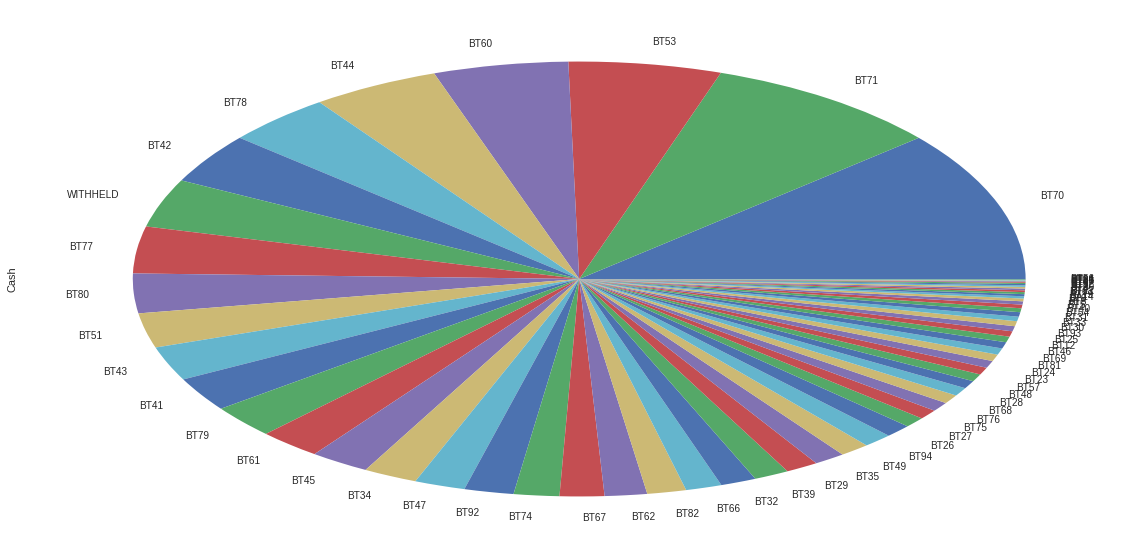

In [173]:
f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax)

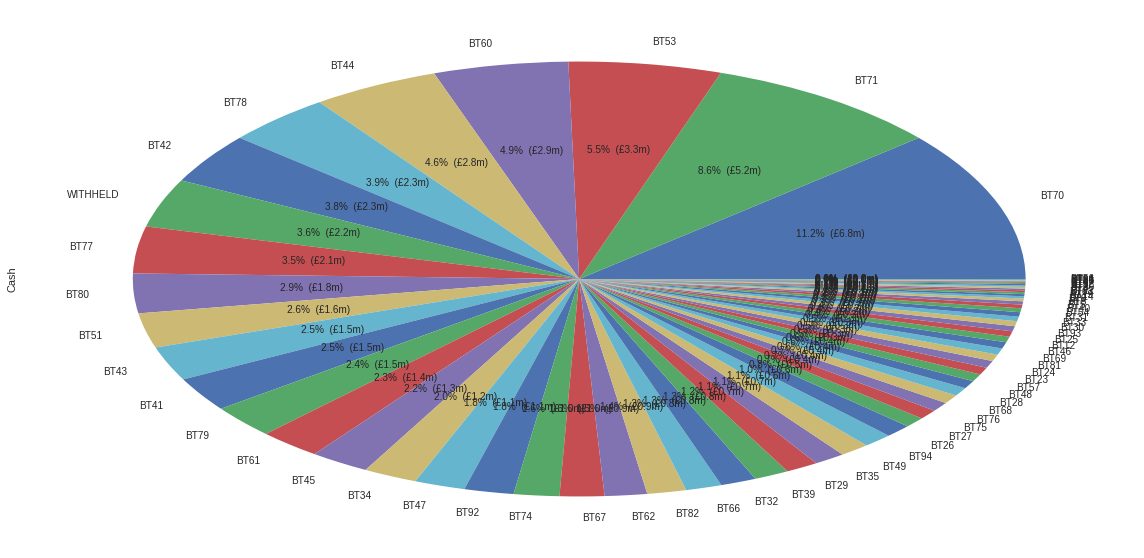

In [174]:
def make_autopct(total):
    def my_autopct(pct):
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  (£{v:,.1f}m)'.format(p=pct,v=val/1000000)
    return my_autopct

f,ax = plt.subplots()
_=df.groupby('Postcode')['Cash'].sum().sort_values(ascending=False)\
    .plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

## Web Assets and Joins (AKA BeautifulSoup)

In [175]:
ea_url = "http://www.eoni.org.uk/Elections/Electoral-areas"
import urllib
_url = urllib.parse.urlparse(ea_url)
_base_url = _url.scheme + '://' + _url.netloc
import requests
from bs4 import BeautifulSoup as bs

r = bs(requests.get(_url.geturl()).text, 'lxml')

for link in r.find_all('a'):
    print(link.contents)

['Sitemap']
['About EONI']
['Contact Us']
[<img alt="The Electoral Office for Northern Ireland home" id="p_lt_ctl01_Logo_btnElem_image" src="/getmedia/83efe217-5085-4f5e-b2bd-9088bb8323d0/logo?width=359&amp;height=86&amp;ext=.jpg" title="The Electoral Office for Northern Ireland home"/>, <span id="p_lt_ctl01_Logo_btnElem_lblText"></span>]
[<img alt="follow us on Twitter" id="p_lt_ctl03_TwitterFeed_btnElem_image" src="/getmedia/6299767c-bc92-482b-af27-8d6bfaf30c2c/icon-twitter?width=30&amp;height=30&amp;ext=.png" title="follow us on Twitter"/>, <span id="p_lt_ctl03_TwitterFeed_btnElem_lblText"></span>]
['Home']
['News']
['Register To Vote']
['Voting']
['Elections']
['Electoral Identity Card']
['FAQs']
['Elections']
['Wards by Constituency (PDF)']
['Wards by District (PDF)']
['Wards by District Electoral Area (PDF)']
['Belfast East Street Index 2017 (XLS)']
['Belfast North Street Index 2017 (XLS)']
['Belfast South Street Index 2017 (XLS)']
['Belfast West Street Index 2017 (XLS)']
['East 

In [176]:
constituency_urls = {}
for link in r.find_all('a'):
    if str(link.contents[0]).endswith('(XLS)'):
        constituency = ' '.join(link.contents[0].split()[:-4])
        constituency_urls[constituency] = _base_url+link.get('href')
        print(constituency,constituency_urls[constituency])

Belfast East http://www.eoni.org.uk/getmedia/ed993710-4b80-46f5-ae6e-ecaf57ed78e8/Belfast-East-Street-Index-18-11-16_1
Belfast North http://www.eoni.org.uk/getmedia/57e481c9-0299-4cee-b3d5-339f1d902405/Belfast-North-Street-Index-18-11-16
Belfast South http://www.eoni.org.uk/getmedia/4616c6ce-52ba-4695-b09d-4eef48580068/Belfast-South-Street-Index-18-11-16
Belfast West http://www.eoni.org.uk/getmedia/aac9bb32-105d-45b9-9f89-46f237e2f9f7/Belfast-West-Street-Index-18-11-16
East Antrim http://www.eoni.org.uk/getmedia/b8193e4d-d21b-4c93-96cf-54029513f9d2/East-Antrim-Street-Index-18-11-16
East Londonderry http://www.eoni.org.uk/getmedia/9f97bc2a-e95a-4a6f-b46a-7b4c1f7aea99/East-Londonderry-Street-Index-18-11-16
Fermanagh and South Tyrone http://www.eoni.org.uk/getmedia/f03947bc-7eca-4c49-a244-1765e4492407/Fermanagh-and-South-Tyrone-Street-Index-18-11-16
Foyle http://www.eoni.org.uk/getmedia/22100a16-1ed1-4440-a24d-7d0508261d2b/Foyle-Street-Index-18-11-16
Lagan Valley http://www.eoni.org.uk/ge

In [177]:
pd.read_excel(constituency_urls['North Antrim']).head()

,NORTH ANTRIM CONSTITUENCY,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Ward,Street,Postal Address,Post Code
2,0401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA
3,0401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD"
4,0401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW


In [178]:
pd.read_excel(constituency_urls['North Antrim'], skiprows=3).head()

,Ward,Street,Postal Address,Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD"
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE


In [179]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


In [180]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


In [181]:
constituency_frames = {}
for _constituency, _url in constituency_urls.items():
    _cons_df = pd.read_excel(_url, skiprows=3)
    _cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
    constituency_frames[_constituency] = _cons_df

In [182]:
constituency_frames['North Antrim'].head()

,Ward,Street,Postal Address,Post Code,Base Post Code
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53


But there's a better way to do this; add the constituency information to *each row* using a single assign

Then simply concatenate all the frames together into one big one

In [183]:
_cons_df = pd.read_excel(constituency_urls['North Antrim'], skiprows=3)
_cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
_cons_df['Constituency'] = 'North Antrim'
_cons_df.head()

,Ward,Street,Postal Address,Post Code,Base Post Code,Constituency
0,401,BALLINDREEN ROAD,"BALLYBOGY, BALLYMONEY",BT53 6PA,BT53,North Antrim
1,401,BALLYBOGY ROAD,"TULLAGHGORE, BALNAMORE","BT53 6NX, BT53 6NY, BT53 6PD, BT53 6PG, BT53 6QD",BT53,North Antrim
2,401,BALLYCLOGH ROAD,"SHELLFIELD, BALLYMONEY",BT53 6NW,BT53,North Antrim
3,401,BALLYMACFIN ROAD,"BALLYMACFIN, MOSSIDE",BT53 8EJ,BT53,North Antrim
4,401,BALLYNARRY ROAD,"DEEPSTOWN, BALLYMONEY",BT53 8AE,BT53,North Antrim


In [184]:
constituency_frames = {}
for _constituency, _url in constituency_urls.items():
    _cons_df = pd.read_excel(_url, skiprows=3)
    _cons_df['Base Post Code'] = _cons_df['Post Code'].apply(lambda s: s.split()[0])
    _cons_df['Constituency'] = _constituency
    constituency_frames[_constituency] = _cons_df
constituency_frame = pd.concat(constituency_frames.values())
constituency_frame.head()

,Ward,Street,Postal Address,Post Code,Base Post Code,Constituency
0,1401,ANNAGORA ROAD,PORTADOWN,BT62 4JE,BT62,Upper Bann
1,1401,BALLYNARRY ROAD,PORTADOWN,"BT62 1TX, BT62 1TY",BT62,Upper Bann
2,1401,BATTLEHILL ROAD,PORTADOWN,BT62 4ER,BT62,Upper Bann
3,1401,BELMONT ROAD,PORTADOWN,"BT62 1RJ, BT62 1RL",BT62,Upper Bann
4,1401,BIRCHES ROAD,PORTADOWN,"BT62 1LS, BT62 1TL",BT62,Upper Bann


We've only got time to look at the postcode-constituency angle, so we'll focus on those columns

In [185]:
constituency_frame[['Base Post Code','Constituency']].head()

,Base Post Code,Constituency
0,BT62,Upper Bann
1,BT62,Upper Bann
2,BT62,Upper Bann
3,BT62,Upper Bann
4,BT62,Upper Bann


However, because postcodes suck, the mapping from Post code to Constituency, especially with only the first part as reported in the RHI stats, is not one-to-one

In [186]:
constituency_frame[constituency_frame['Base Post Code'] == 'BT41']\
    .Constituency.unique()

array(['East Londonderry', 'Mid Ulster', 'South Antrim', 'East Antrim',
       'North Antrim'], dtype=object)

In [187]:
constituency_frame[['Base Post Code','Constituency']]\
    .groupby('Base Post Code')['Constituency'].describe()\
    .unstack().sort_values('unique').tail()

,count,unique,top,freq
Base Post Code,,,,
BT17,448,4,Belfast West,301
BT71,825,4,Fermanagh and South Tyrone,392
BT39,490,4,South Antrim,455
BT32,532,4,Upper Bann,372
BT41,704,5,South Antrim,650


In [188]:
postcode_cons_map = constituency_frame[['Base Post Code','Constituency']]\
    .groupby('Base Post Code')['Constituency'].max()\
    .to_frame().reset_index()
postcode_cons_map

,Base Post Code,Constituency
0,BFPO,South Antrim
1,BT,Foyle
2,BT1,Belfast West
3,BT10,Belfast West
4,BT11,Belfast West
5,BT12,Belfast West
6,BT13,Belfast West
7,BT14,South Antrim
8,BT15,Belfast North
9,BT16,Strangford


SQL-style joins (yes, it does inner, outer, left etc)

In [189]:
postcode_cons_map = postcode_cons_map.rename(columns={'Base Post Code':'Postcode'})
con_df=pd.merge(df,postcode_cons_map, on='Postcode', how='left')
display(df.shape)
display(con_df.shape)
con_df

(1747, 6)

(1747, 7)

,Company,Postcode,Type,Capacity (kWtH),Date,Cash,Constituency
0,Aaron Newell,BT39,Solid Biomass Boiler,60.0,2015-09-04,19084.69,South Antrim
1,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-11-06,27600.66,Fermanagh and South Tyrone
2,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-11-06,30507.19,Fermanagh and South Tyrone
3,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-11-06,34416.23,Fermanagh and South Tyrone
4,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-07-13,50543.44,Fermanagh and South Tyrone
5,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-07-13,52297.88,Fermanagh and South Tyrone
6,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-07-13,53369.70,Fermanagh and South Tyrone
7,Acheson & Glover Precast Ltd,BT75,Solid Biomass Boiler,99.0,2015-07-13,53475.84,Fermanagh and South Tyrone
8,ACL Developments Ltd,BT80,Solid Biomass Boiler,43.0,2015-11-06,7209.13,Mid Ulster
9,Adam Cardwell OBO Cardwell Brothers Engineering,BT80,Solid Biomass Boiler,99.0,2015-10-30,34181.14,Mid Ulster


Pass-through plotting arguments to `matplotlib` (i.e. `autopct`)

In [190]:
con_df.loc[con_df.Postcode=='WITHHELD','Constituency'] = 'Withheld'
con_df['Constituency']= con_df.Constituency.fillna('National Trust')
con_df = con_df[~con_df.Cash.isnull()]

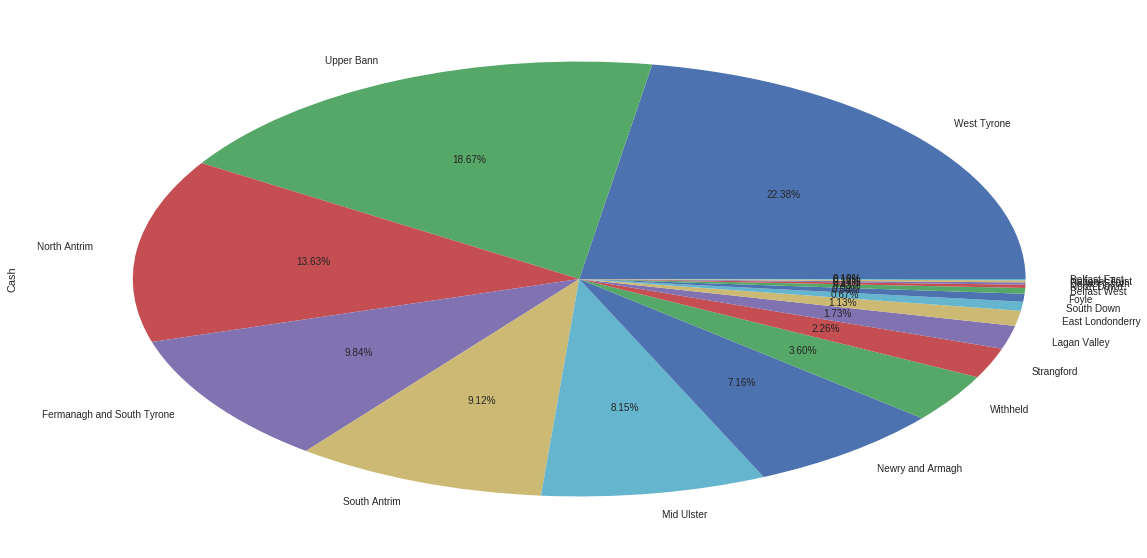

In [191]:
f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct='%.2f%%')

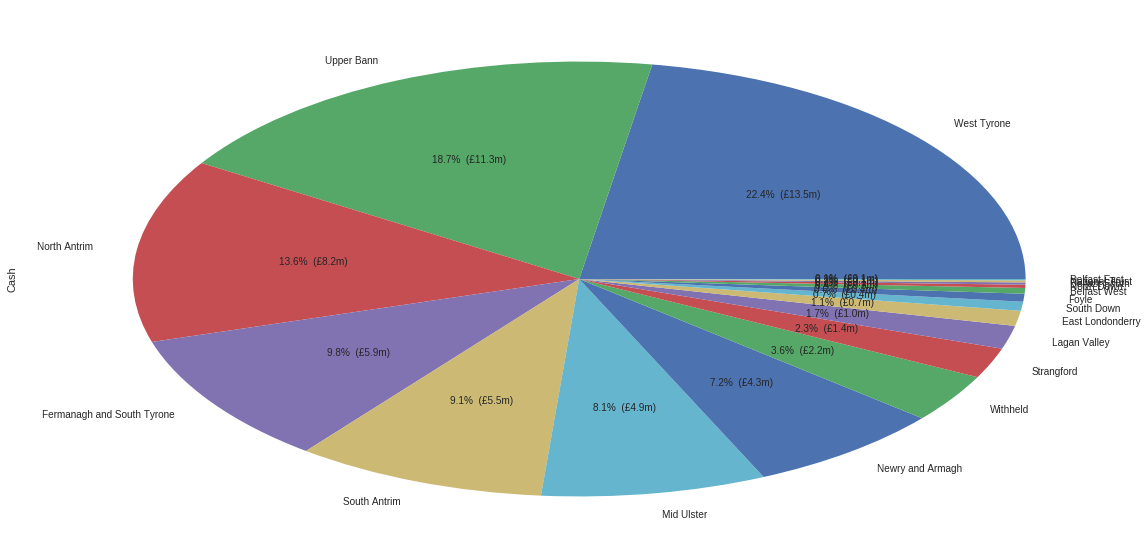

In [192]:

f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

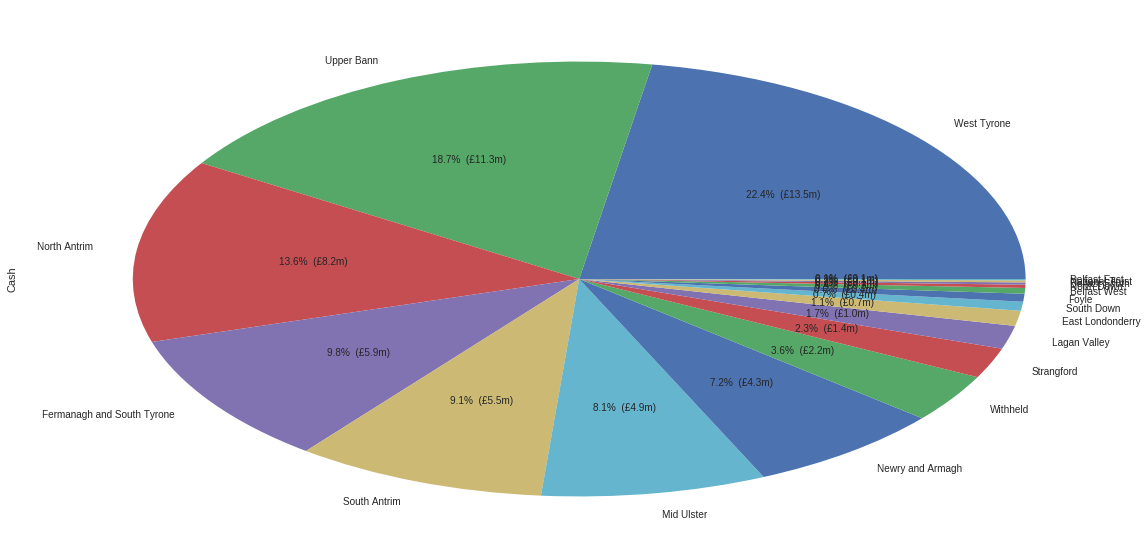

In [193]:

f,ax = plt.subplots()
_=con_df.groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.pie(ax=ax, autopct=make_autopct(df.Cash.sum()))

## DateTime Formatting and Grouping

In [194]:
con_df.groupby(pd.TimeGrouper(key='Date',freq='M')).size()

Date
2013-01-31      2
2013-02-28      3
2013-03-31      2
2013-04-30      2
2013-05-31      8
2013-06-30      6
2013-07-31      5
2013-08-31      9
2013-09-30      7
2013-10-31     10
2013-11-30      9
2013-12-31     14
2014-01-31     12
2014-02-28     11
2014-03-31     18
2014-04-30     16
2014-05-31     27
2014-06-30     31
2014-07-31     29
2014-08-31     28
2014-09-30     21
2014-10-31     39
2014-11-30     38
2014-12-31     30
2015-01-31     52
2015-02-28     29
2015-03-31     61
2015-04-30     43
2015-05-31     49
2015-06-30     47
2015-07-31     45
2015-08-31     41
2015-09-30     87
2015-10-31    459
2015-11-30    284
2015-12-31      1
2016-01-31      1
2016-02-29    170
Freq: M, dtype: int64

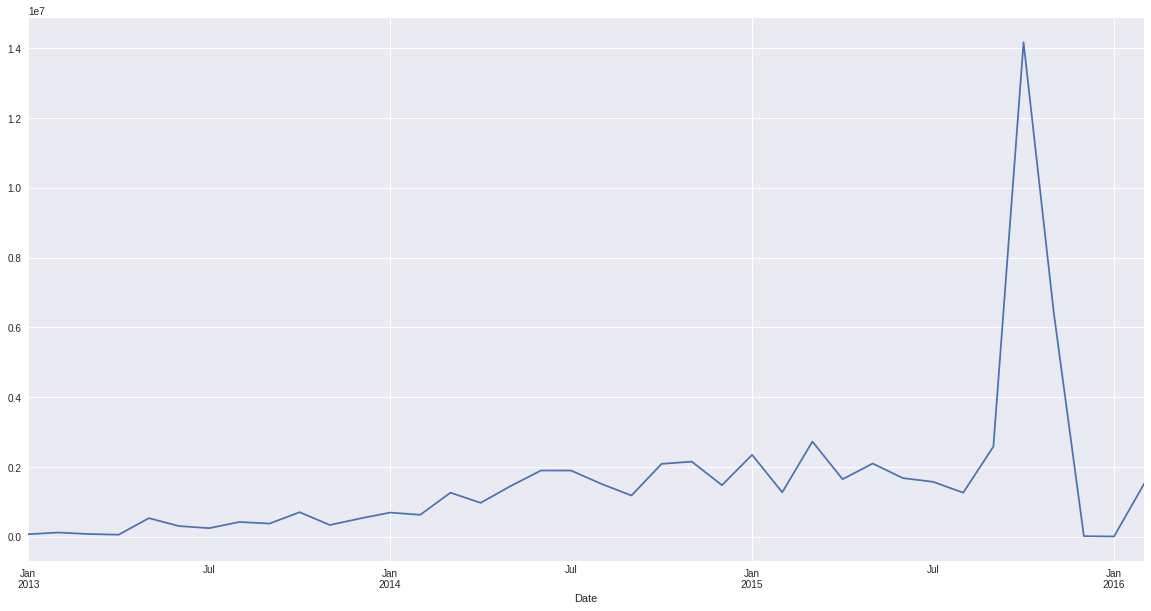

In [195]:
f,ax = plt.subplots()
con_df.groupby(pd.TimeGrouper(key='Date',freq='M'))['Cash'].sum().plot(ax=ax)

In [196]:
df.Cash.sum()-27621865.020000003

32673975.080000013

In [197]:
con_df[~con_df.Constituency.isnull()].groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash']\
.sum().unstack().head()

Constituency,Belfast East,Belfast South,Belfast West,East Londonderry,Fermanagh and South Tyrone,Foyle,Lagan Valley,Mid Ulster,National Trust,Newry and Armagh,North Antrim,North Down,South Antrim,South Down,Strangford,Upper Bann,West Tyrone,Withheld
Date,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,64016.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6995.34,NaN,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,71743.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27822.92,NaN,NaN,NaN,19873.24,NaN
2013-03-31,NaN,NaN,37234.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38638.25,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26159.07,NaN,NaN,NaN,NaN,30542.34,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,132964.34,51611.56,NaN,172751.55,NaN,NaN,NaN,NaN,31631.25,NaN,NaN,84285.55,58044.85,NaN


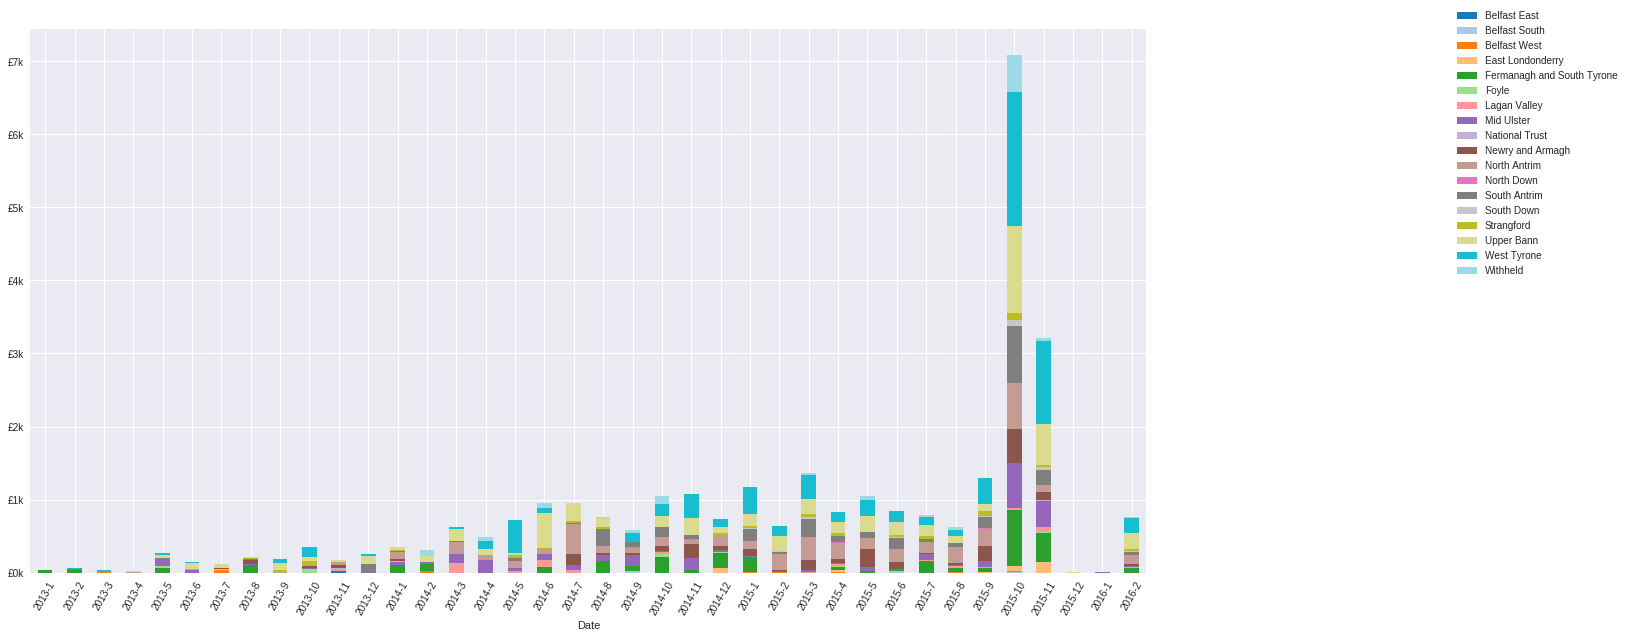

In [198]:
from matplotlib import dates
import matplotlib.ticker as tick

def _x_month_formatter(x,y):
    return '{year}-{month}'.format(year=x.year, month=x.month)

f,ax = plt.subplots()
_con_df_month_con=con_df.groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash'].sum().unstack()
_con_df_month_con.plot.bar(ax=ax, stacked=True, cmap=plt.get_cmap('Vega20'))

ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '£{:,d}k'.format(x)))
ax.xaxis.set_major_formatter(tick.FixedFormatter(_con_df_month_con.index.map(lambda d: '{}-{}'.format(d.year,d.month))))
_=plt.setp( ax.xaxis.get_majorticklabels(), rotation=60 )
ax.legend(loc='upper center', bbox_to_anchor=(1.35, 1.05),
          ncol=1, fancybox=True, shadow=True)

# `seaborn`
Fancy plots and quick analysis

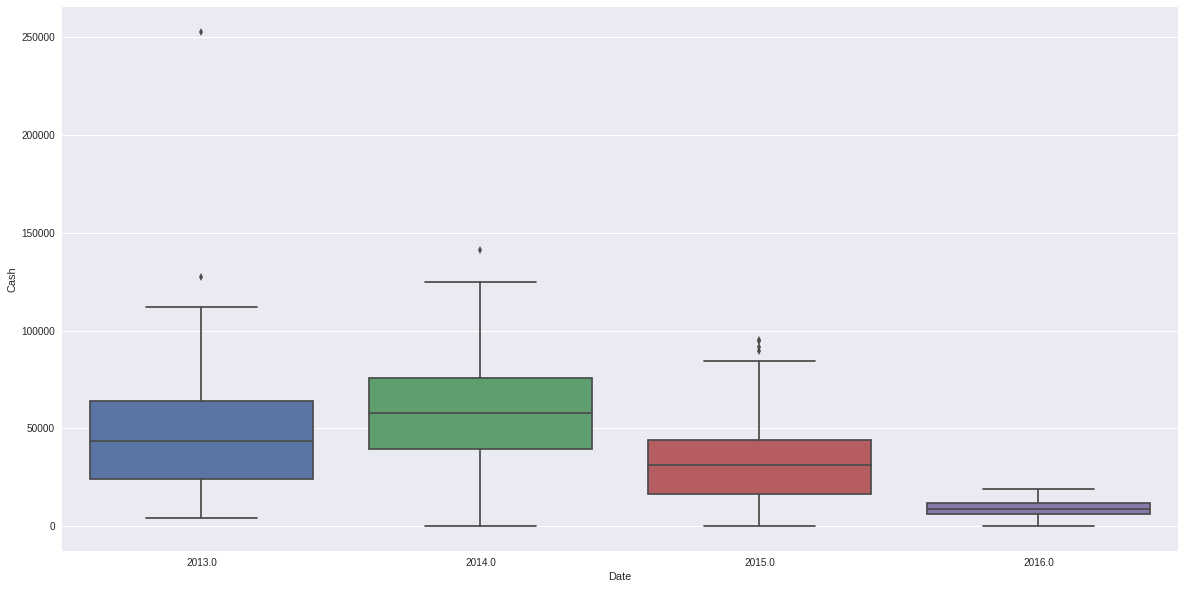

In [199]:
import seaborn as sns
f,ax = plt.subplots()
sns.boxplot(data=df, x=df.Date.dt.year, y='Cash',ax=ax)

In [200]:
df.sort_values('Cash', ascending=False)

,Company,Postcode,Type,Capacity (kWtH),Date,Cash
518,Eglinton (Timber Products) Ltd,BT47,Solid Biomass Boiler,990.0,2013-10-05,252844.05
1521,Stewart Law OBO Oatlands Farm,BT26,Solid Biomass Boiler,99.0,2014-03-30,141430.53
1053,McIlroy Farms Limited,BT51,Solid Biomass Boiler,90.0,2013-05-09,127605.27
1520,Stewart Law OBO Oatlands Farm,BT26,Solid Biomass Boiler,99.0,2014-03-30,124776.63
636,Green Biomass Ltd,BT82,Solid Biomass Boiler,99.0,2014-04-11,119012.29
1582,Tom Forgrave OBO Knockanloan,BT53,Solid Biomass Boiler,99.0,2014-03-18,114769.04
1581,Tom Forgrave OBO Knockanloan,BT53,Solid Biomass Boiler,99.0,2014-03-09,113719.79
1257,Paul Hobson Ltd,BT71,Solid Biomass Boiler,99.0,2013-07-08,112267.25
1052,McIlroy Farms Limited,BT51,Solid Biomass Boiler,99.0,2014-03-11,109827.91
1580,Tom Forgrave OBO Knockanloan,BT53,Solid Biomass Boiler,99.0,2014-03-09,106048.09


In [201]:

df[df.Date>=pd.Timestamp('2015/10/01')].sort_values('Cash', ascending=False)

,Company,Postcode,Type,Capacity (kWtH),Date,Cash
347,Crann Energy Ltd,BT92,Solid Biomass Boiler,99.0,2015-10-12,65453.82
1288,PM Processing Ltd,BT92,Solid Biomass Boiler,99.0,2015-10-14,64595.05
1728,Withheld,WITHHELD,Solid Biomass Boiler,99.0,2015-10-23,63436.63
1727,Withheld,WITHHELD,Solid Biomass Boiler,99.0,2015-10-23,62523.73
1287,PM Processing Ltd,BT92,Solid Biomass Boiler,99.0,2015-10-02,59385.45
1233,Patsy McGinley OBO McGinley Poultry,BT78,Solid Biomass Boiler,99.0,2015-10-12,59104.80
734,Inish Glow Ltd,BT92,Solid Biomass Boiler,99.0,2015-10-26,57683.51
1264,Peacock Farms Poultry Ltd,BT82,Solid Biomass Boiler,99.0,2015-10-14,56757.26
1265,Peacock Farms Poultry Ltd,BT82,Solid Biomass Boiler,99.0,2015-10-14,56489.45
809,John Adams,BT44,Solid Biomass Boiler,99.0,2015-10-13,56457.47


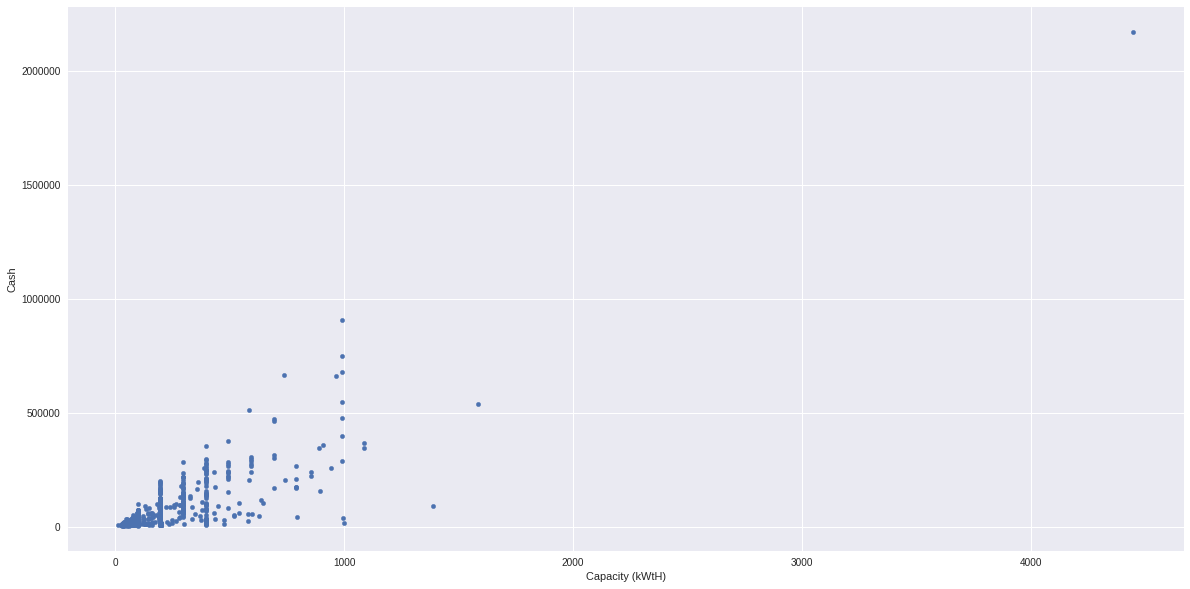

In [202]:
con_df.groupby('Company').sum().plot.scatter(x="Capacity (kWtH)",y="Cash")

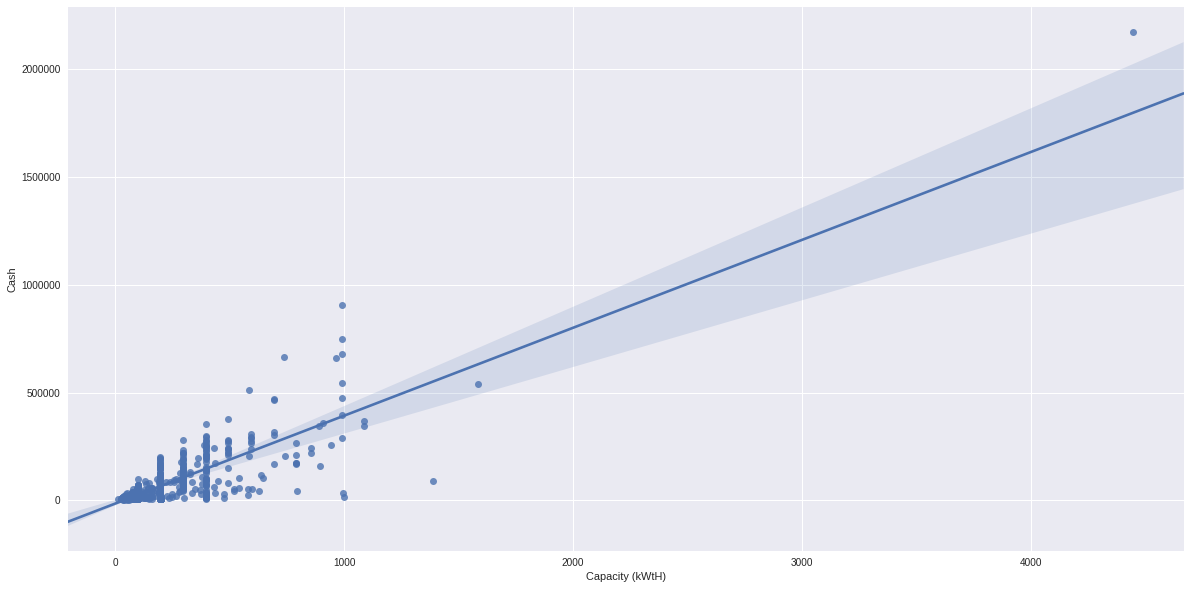

In [203]:
f,ax = plt.subplots()
sns.regplot(x="Capacity (kWtH)",y="Cash", data=con_df.groupby('Company').sum(), ax=ax)

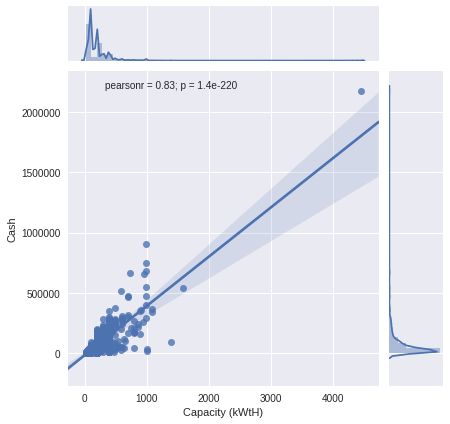

In [204]:
sns.jointplot(x="Capacity (kWtH)",y="Cash", data=con_df.groupby('Company').sum(), kind='reg')

In [205]:
company_df = con_df.groupby('Company').sum()
company_df['N'] = con_df.groupby('Company').size()
company_df['Cash Per Cap.'] = company_df['Cash']/company_df['Capacity (kWtH)']
company_df.sort_values('Cash Per Cap.', ascending=False)
##http://www.newsletter.co.uk/news/farmer-who-got-660k-for-13-rhi-boilers-says-only-80k-was-profit-1-7870639

,Capacity (kWtH),Cash,N,Cash Per Cap.
Company,,,,
John Gilliland OBO Brook Hall Estate,198.0,199546.82,2,1007.812222
Green Biomass Ltd,198.0,196804.93,2,993.964293
Conor Teague,99.0,97280.85,1,982.634848
Phelim McGee,198.0,193304.65,2,976.286111
James Hagan and Siobhan Hagan,297.0,281593.06,3,948.124781
Noel Smith Ltd,198.0,187532.13,2,947.131970
Frederick Maxwell OBO Maxwell Farms,990.0,906415.26,10,915.570970
Jeremy Hobson,738.0,665204.04,8,901.360488
Colin Newell,198.0,176478.53,2,891.305707


In [219]:
company_df.sort_values('Cash', ascending=False)

,Capacity (kWtH),Cash,N,Cash Per Cap.
Company,,,,
Withheld,4445.0,2173362.99,46,488.945555
Frederick Maxwell OBO Maxwell Farms,990.0,906415.26,10,915.570970
Tom Forgrave OBO Knockanloan,990.0,748120.98,10,755.677758
Gareth Nelson,990.0,679634.84,10,686.499838
Jeremy Hobson,738.0,665204.04,8,901.360488
Paul Hobson Ltd,963.0,659540.81,13,684.881423
Colin Newell OBO Ballyboyland Biomass,990.0,545595.34,10,551.106404
Eglinton (Timber Products) Ltd,1584.0,538885.63,7,340.205574
McIlroy Farms Limited,585.0,513312.78,6,877.457744


# `cufflinks`

Fancy interactive plotting with `plotly`

In [220]:
import cufflinks
con_df.groupby(pd.TimeGrouper(key='Date',freq='M'))['Cash'].sum()\
    .iplot()

In [221]:
_con_df_month_con=con_df.groupby([pd.TimeGrouper(key='Date',freq='M'),'Constituency'])['Cash'].sum().unstack()
_con_df_month_con.iplot()

In [222]:
# https://plot.ly/~bolster/211

_con_df_month_con.iplot(kind='bar', 
                        barmode='stack', 
                        filename='pybfs-stackedbar-may-17',
                        world_readable=True)

In [223]:
_con_df_month_con.iplot(kind='heatmap',colorscale='spectral')

In [210]:
_con_df_month_con.head()

Constituency,Belfast East,Belfast South,Belfast West,East Londonderry,Fermanagh and South Tyrone,Foyle,Lagan Valley,Mid Ulster,National Trust,Newry and Armagh,North Antrim,North Down,South Antrim,South Down,Strangford,Upper Bann,West Tyrone,Withheld
Date,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,64016.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6995.34,NaN,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,71743.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27822.92,NaN,NaN,NaN,19873.24,NaN
2013-03-31,NaN,NaN,37234.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38638.25,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26159.07,NaN,NaN,NaN,NaN,30542.34,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,132964.34,51611.56,NaN,172751.55,NaN,NaN,NaN,NaN,31631.25,NaN,NaN,84285.55,58044.85,NaN


In [211]:
_con_df_month_con.sum().sort_values(ascending=False)

Constituency
West Tyrone                   13496893.09
Upper Bann                    11254545.39
North Antrim                   8215759.26
Fermanagh and South Tyrone     5933986.94
South Antrim                   5497459.97
Mid Ulster                     4911558.45
Newry and Armagh               4316339.85
Withheld                       2173362.99
Strangford                     1365137.15
Lagan Valley                   1043198.32
East Londonderry                678555.61
South Down                      403570.20
Foyle                           352278.21
Belfast West                    257127.67
North Down                      143551.82
Belfast South                   101001.24
National Trust                   93785.72
Belfast East                     57728.22
dtype: float64

In [224]:
_con_df_month_con[_con_df_month_con.sum().sort_values(ascending=False).index]\
.iplot(kind='heatmap',colorscale='spectral', filename='pybfs-heatmap-may-17',world_readable=True)

# Extra Fun Bits
## TQDM Notebook


In [213]:
from tqdm import tqdm, tqdm_notebook, tqdm_pandas, tnrange
from time import sleep

for j in tqdm_notebook(range(100), desc='2nd loop'):
    sleep(0.01)

In [214]:
_df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
tn=tqdm_notebook()
tn.pandas(desc='Wrong kind of bar')
def worker(value):
    sleep(0.1)
    return value.sum()
_df.progress_apply(worker)


0    4958893
1    4954431
2    4964293
3    4939769
4    4954198
5    4940869
dtype: int64

In [215]:
_df = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
tn=tqdm_notebook()
tn.pandas(desc='Wrong kind of bar')
def worker(value):
    sleep(0.1)
    if not value.sum()%10:
        tn.write('Teven')
    return value.sum()
_df.progress_apply(worker)


0    4961046
1    4942012
2    4952551
3    4969861
4    4950967
5    4951012
dtype: int64

# Extra Toys

In [225]:
df[df.Company.str.contains('urch')]

ValueError: cannot index with vector containing NA / NaN values

In [226]:
df.groupby('Company')['Capacity (kWtH)'].sum().sort_values(ascending=False).head()

Company
Withheld                          4445.0
Eglinton (Timber Products) Ltd    1584.0
Jason Browne OBO EJ&MJ Browne     1387.0
John Hogg & Co Ltd                1089.0
Dennison Commercials Ltd          1089.0
Name: Capacity (kWtH), dtype: float64

In [227]:
df.groupby('Company').size().sort_values(ascending=False).head()

Company
Withheld                    46
Paul Hobson Ltd             13
John Hogg & Co Ltd          11
Dennison Commercials Ltd    11
Ecobiomass NI Ltd           10
dtype: int64

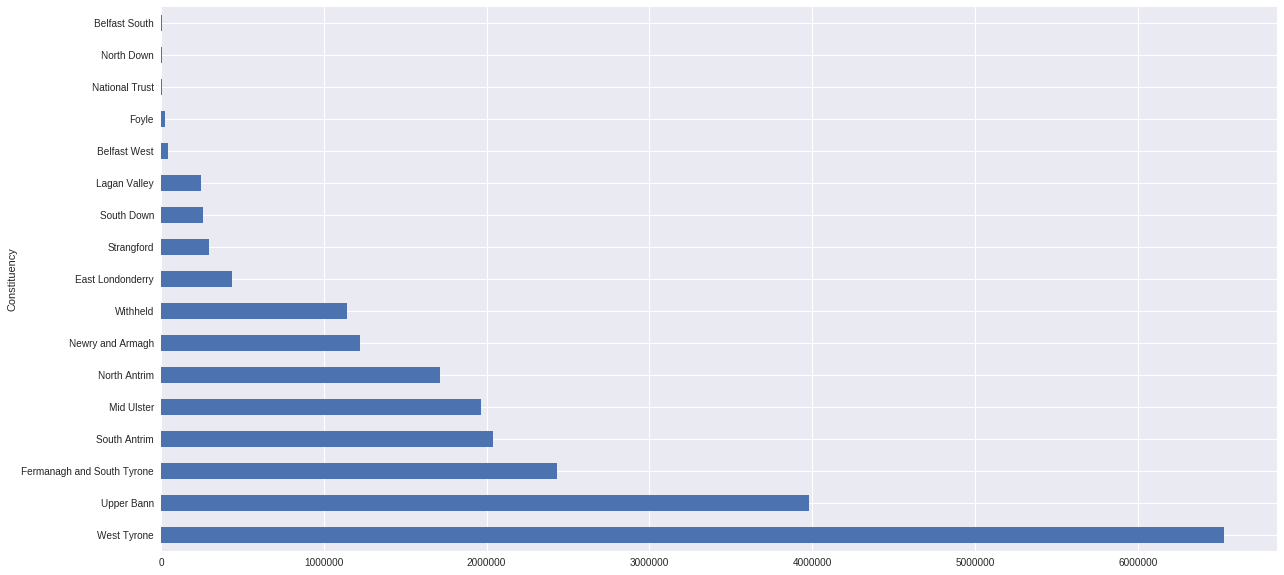

In [228]:
con_df[con_df.Date > pd.Timestamp('2015/09/28')].groupby('Constituency')['Cash'].sum().sort_values(ascending=False).plot.barh()

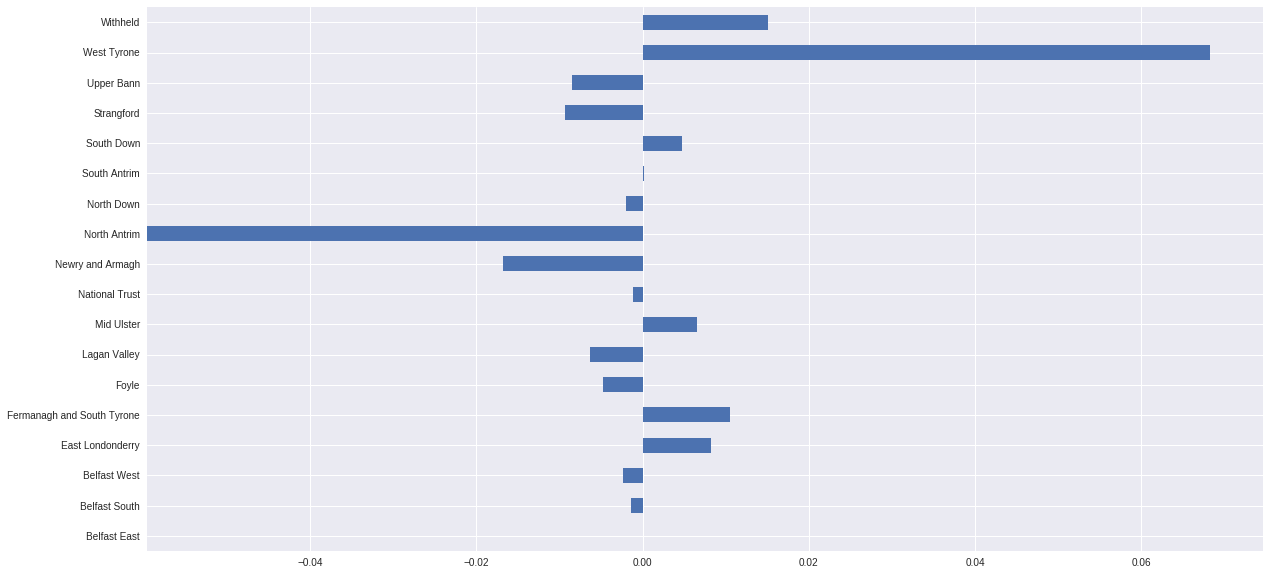

In [229]:
# All-time ratios of how much cash each constituency got
con_ratio = con_df.groupby('Constituency')['Cash'].sum()/con_df['Cash'].sum()

# October/November/December 2015 ratios of how much cash each constituency got
nov_con_ratio = con_df[con_df.Date > pd.Timestamp('2015/09/28')].groupby('Constituency')['Cash'].sum()/con_df[con_df.Date > pd.Timestamp('2015/09/28')]['Cash'].sum()

# How much each constituency increased above their normal application cost ratio in the final months of RHI
pd.concat([con_ratio, nov_con_ratio], keys=['fuggit','this'], axis=1).diff(axis=1)['this'].plot.barh()

In [234]:
con_df.to_hdf('datastore.h5','may')

In [235]:
old_con_df = pd.read_hdf('datastore.h5','original')

In [237]:
def ratio(con_df):
    return con_df.groupby('Constituency')['Cash'].sum()/con_df['Cash'].sum()

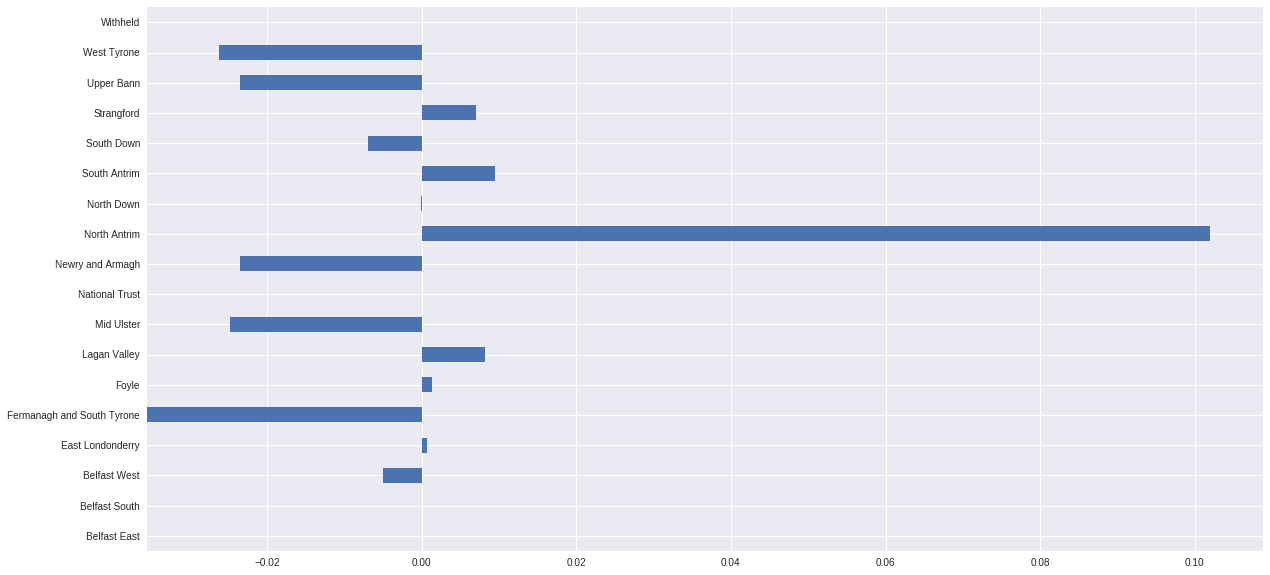

In [246]:
pd.concat(map(ratio, [old_con_df, con_df]),keys=['old','new'], axis=1).diff(axis=1)['new'].plot.barh()

In [245]:
pd.concat(map(ratio, [con_df, old_con_df]),keys=['new','old'], axis=1)

,new,old
Belfast East,0.000957,NaN
Belfast South,0.001675,NaN
Belfast West,0.004264,0.009309
East Londonderry,0.011254,0.010527
Fermanagh and South Tyrone,0.098415,0.133955
Foyle,0.005842,0.004451
Lagan Valley,0.017301,0.009091
Mid Ulster,0.081458,0.106291
National Trust,0.001555,NaN
Newry and Armagh,0.071586,0.095074


In [247]:
ratio(con_df)

Constituency
Belfast East                  0.000957
Belfast South                 0.001675
Belfast West                  0.004264
East Londonderry              0.011254
Fermanagh and South Tyrone    0.098415
Foyle                         0.005842
Lagan Valley                  0.017301
Mid Ulster                    0.081458
National Trust                0.001555
Newry and Armagh              0.071586
North Antrim                  0.136257
North Down                    0.002381
South Antrim                  0.091175
South Down                    0.006693
Strangford                    0.022641
Upper Bann                    0.186655
West Tyrone                   0.223845
Withheld                      0.036045
Name: Cash, dtype: float64